In [2]:
import pandas as pd
from scipy.stats import chi2_contingency
import os

# base_dir = r"D:\DSpit\AIH"
base_dir = !pwd
base_dir = base_dir[0]
base_dir = "../"


csv_path = os.path.join(
    base_dir,
    "lab",
    "Diabetic-Patients-Readmission-Prediction",
    "CSV Files",
    "Diabetes_cleaned.csv",
)
csv_path

'../lab/Diabetic-Patients-Readmission-Prediction/CSV Files/Diabetes_cleaned.csv'

In [9]:
# Load your dataset
df = pd.read_csv(csv_path)
print(df.head())
df.head()

              race  gender  age discharge_disposition_id admission_source_id  \
0        Caucasian       0    5            Not Available            Referral   
1        Caucasian       0   15       Discharged to home           Emergency   
2  AfricanAmerican       0   25       Discharged to home           Emergency   
3        Caucasian       1   35       Discharged to home           Emergency   
4        Caucasian       1   45       Discharged to home           Emergency   

   time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
0                 1                  41               0                1   
1                 3                  59               0               18   
2                 2                  11               5               13   
3                 2                  44               1               16   
4                 1                  51               0                8   

                                        diag_1  ... glipizide 

,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,...,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,diabetesMed,readmitted,preceding_year_visits,number_changes,insulin_treatment
0,Caucasian,0,5,Not Available,Referral,1,41,0,1,Diabetes,...,-2,-2,-2,-2,-2,0,0,0,0.0,no_med
1,Caucasian,0,15,Discharged to home,Emergency,3,59,0,18,"Endocrine, Nutritional, Metabolic, Immunity",...,-2,-2,-2,-2,1,1,0,0,1.0,insulin_only
2,AfricanAmerican,0,25,Discharged to home,Emergency,2,11,5,13,"Pregnancy, Childbirth",...,0,-2,-2,-2,-2,1,0,3,0.0,other_meds
3,Caucasian,1,35,Discharged to home,Emergency,2,44,1,16,Infectious and Parasitic,...,-2,-2,-2,-2,1,1,0,0,1.0,insulin_only
4,Caucasian,1,45,Discharged to home,Emergency,1,51,0,8,Neoplasms,...,0,-2,-2,-2,0,1,0,0,0.0,insulin_combo


In [7]:
# contingency_table = pd.crosstab(df['gender'], df['time_in_hospital'])
contingency_table = pd.crosstab(df['gender'], df['discharge_disposition_id'])
contingency_table.head()

discharge_disposition_id,Discharged to home,Discharged to home with home health service,Left AMA,Not Available,Still patient/referred to this institution,Transferred to another medical facility
gender,,,,,,
0,30110,7260,244,2480,55,12172
1,28641,5537,366,2164,46,7995


In [8]:

# The Null Hypothesis is that there is no association between the two variables
# The Alternative Hypothesis is that there is an association between the two variables

# The p-value is the probability of observing a test statistic as extreme as the one computed from the data
# given that the null hypothesis is true

# If the p-value is less than the significance level (0.05), then we reject the null hypothesis
# and conclude that the variables are associated

# If the p-value is greater than the significance level (0.05), then we fail to reject the null hypothesis
# and conclude that the variables are independent



# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test Results:")
print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)


Chi-Square Test Results:
Chi2 Statistic: 593.5169435057427
P-value: 5.088562170534433e-126
Degrees of Freedom: 5
Expected Frequencies:
[[31666.95241578  6897.61859483   328.79169671  2503.12891728
     54.43928093 10870.06909447]
 [27084.04758422  5899.38140517   281.20830329  2140.87108272
     46.56071907  9296.93090553]]


## Conclusion

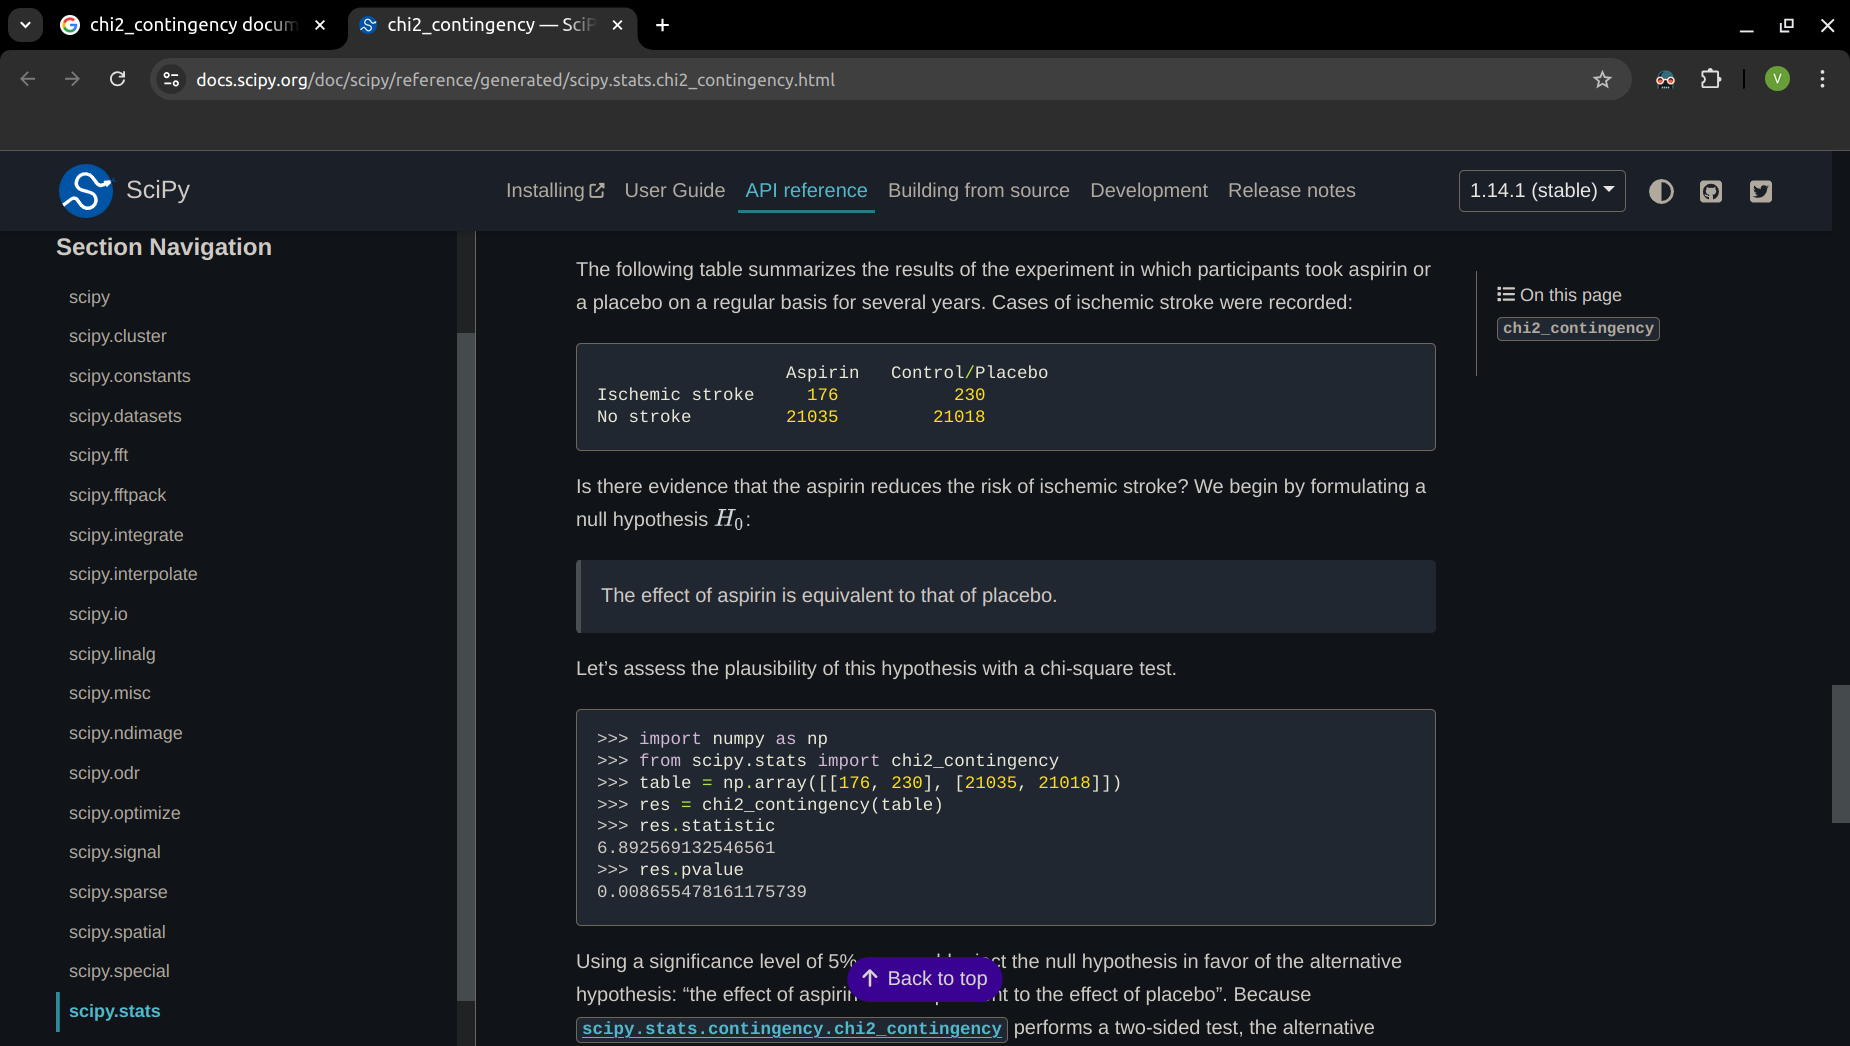

